<a href="https://colab.research.google.com/github/dheerajpoonia29/machineLearningAlgorithm-courseWork/blob/master/piet-i3-day/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Logistic Regression**

### A popular classification technique to predict binomial outcomes (y = 0 or 1) is called Logistic Regression.

Properties of Logistic Regression:
> The Dependent variable in logistic Regression follows Bernoulli Distribution

> Estimation is done through Maximum Likely hood.

> No R square, model fitness is calcualted through Concordance, KS-Statistics.

#Maximum Likelihood Estimation

The MLE is a “likelihood” maximization method, while OLS is a distance-minimizing approximation method. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.




#Logistic Regression Assumptions
>Binary logistic regression requires the dependent variable to be binary.

>For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

>Only meaningful variables should be included.

>The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

>The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.

##In this example, a magazine reseller is trying to decide what magazines to market to customers.

Data can be taken from [Here](https://docs.google.com/spreadsheets/d/1VqOigEwotTPUnGyUbtYSwJiJepRrNgki9k3vrAVkbus/edit?usp=sharing)

> Household Income (Income; rounded to the nearest $1,000.00)

> Gender (IsFemale = 1 if the person is female, 0 otherwise)

> Marital Status (IsMarried = 1 if married, 0 otherwise)

>College Educated (HasCollege = 1 if has one or more years of college education, 0 otherwise)

>Employed in a Profession (IsProfessional = 1 if employed in a profession, 0 otherwise)

>Retired (IsRetired = 1 if retired, 0 otherwise)

>Not employed (Unemployed = 1 if not employed, 0 otherwise)

>Length of Residency in Current City (ResLength; in years)

>Dual Income if Married (Dual = 1 if dual income, 0 otherwise)

>Children (Minors = 1 if children under 18 are in the household, 0 otherwise)

>Home ownership (Own = 1 if own residence, 0 otherwise)

>Resident type (House = 1 if the residence is a single-family house, 0 otherwise)

>Race (White = 1 if the race is white, 0 otherwise)

>Language (English = 1 is the primary language in the household is English, 0 otherwise)

# Load Data

Load Data onto google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KidCreative.csv to KidCreative.csv


##Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Load and see the Data

In [ ]:
kidDataset = pd.read_csv("KidCreative.csv")
kidDataset.head()

,Obs No.,Buy,Income,IsFemale,IsMarried,HasCollege,IsProfessional,IsRetired,Unemployed,ResidenceLength,Dual,Minors,Own,House,White,English,PrevChildMag,PrevParentMag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


Remove first column “Obs No.” as it doesn’t have any relevance.

In [ ]:
kidDataset.drop(columns=['Obs No.'])

,Buy,Income,IsFemale,IsMarried,HasCollege,IsProfessional,IsRetired,Unemployed,ResidenceLength,Dual,Minors,Own,House,White,English,PrevChildMag,PrevParentMag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,0,27000,1,0,0,0,0,0,6,0,1,1,1,1,1,0,0
669,0,3000,1,0,0,0,0,0,11,0,1,0,1,0,1,0,0
670,1,75000,1,1,0,1,0,0,52,0,0,1,1,1,1,0,0
671,1,51000,1,1,0,1,0,0,10,1,1,1,1,1,1,0,0


###Check for null values anywhere in our dataset. If you have zero values for all the columns then it meant we don’t have any null value in any of the columns.

In [ ]:
kidDataset.isnull().sum()

Obs No.            0
Buy                0
Income             0
IsFemale           0
IsMarried          0
HasCollege         0
IsProfessional     0
IsRetired          0
Unemployed         0
ResidenceLength    0
Dual               0
Minors             0
Own                0
House              0
White              0
English            0
PrevChildMag       0
PrevParentMag      0
dtype: int64

### Let us explore our target variable and visualize it.

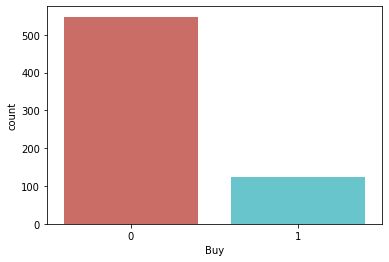

In [ ]:
kidDataset.Buy.value_counts()
sns.countplot(x = 'Buy', data = kidDataset, palette = 'hls')
plt.show()

#Test Train Split and Dependent and Independent Split

In [ ]:
X = kidDataset[['Income', 'IsFemale', 'IsMarried', 'HasCollege', 'IsProfessional', 'IsRetired', 'Unemployed', 'ResidenceLength', 'Dual','Minors','Own', 'House','White',
'English', 'PrevChildMag', 'PrevParentMag']]
y = kidDataset['Buy']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# Instantiate Logistic Regression and Fit on train data

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction on test Data

In [ ]:
y_pred=logreg.predict(X_test)

#Model Evaluation using Confusion Matrix

Few terms to remember in the context of confusion matrix:

> True positives (TP): These are cases in which we predicted yes and are actually yes.

> True negatives (TN): We predicted no, and no in actual.

> False positives (FP): We predicted yes, but actual is no. (Type I error)

>False negatives (FN): We predicted no, yes in actual. (Type II error)


There is also a list of rates that are often computed from a confusion matrix for a binary classifier:

> Accuracy: Overall, how often is the classifier correct?
> > Accuracy = (TP + TN)/total

> Misclassification Rate(Error Rate): Overall, how often is it wrong?

> >Misclassification Rate = (FP+FN)/total

> True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes?

> > True Positive Rate = TP/actual yes

> False Positive Rate: When it’s actually no, how often does it predict yes?

> > False Positive Rate=FP/actual no

> True Negative Rate(Specificity): When it’s actually no, how often does it predict no?

> > True Negative Rate=TN/actual no

> Precision: When it predicts yes, how often is it correct?

> > Precision=TP/predicted yes

> Prevalence: How often does the yes condition actually occur in our sample?

> > Prevalence=actual yes/total

###compute the confusion matrix taking parameters test data of target variable and predicted target data.

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[90, 24],
       [11, 10]])

#Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

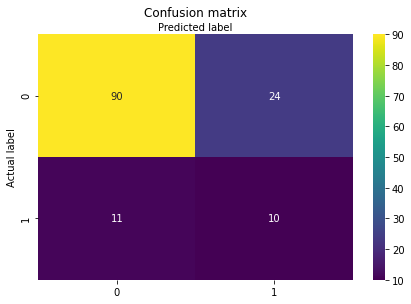

In [ ]:
class_names = set(y)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7407407407407407
Precision: 0.29411764705882354
Recall: 0.47619047619047616


#ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate(Recall) against the false positive rate. It shows the tradeoff between sensitivity and specificity.

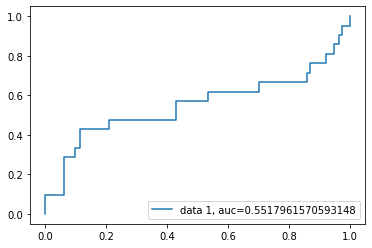

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()